In [97]:
import numpy as np
from scipy.signal import correlate2d
import matplotlib.pyplot as plt
import time
from IPython import display
from IPython.html import widgets
plt.style.use('ggplot')

In [98]:
im1 = np.nan_to_num(np.load('datasets/livneh/trainB/0.npz')['data'])
im2 = np.nan_to_num(np.load('datasets/livneh/trainB/150.npz')['data'])

In [99]:
im1 = im1 / np.max(im1)
im2 = im2 / np.max(im2)

In [100]:
print("hi")

hi


In [101]:
#lets try and implement some of this stuff

In [102]:
def im_circcorr(im1, im2):
    #return circular correlation of images 1 and 2:
    if im1.shape != im2.shape:
        print("arrays need to have same shape")
        return None
    corrmat = np.zeros(im1.shape)
    shiftmat = np.tile(im2, (2,2))
    
    for xshift in range(0, im1.shape[0]):
        for yshift in range(0, im1.shape[1]):
            corrmat[xshift, yshift] = np.dot(np.ravel(im1), np.ravel(shiftmat[xshift:im2.shape[0] + xshift, yshift:im2.shape[1] + yshift]))
    return corrmat/np.max(corrmat)

In [103]:
temp = im_circcorr(im1[:,:,0], im2[:,:,0])

In [162]:
#plotting stuff just to see

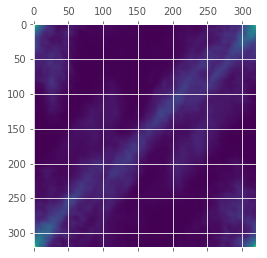

In [104]:
plt.matshow(temp)

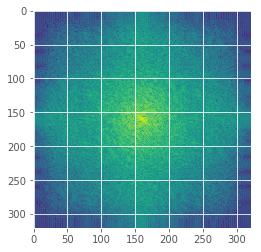

In [111]:
psd=np.log10(abs(np.fft.fftshift(np.fft.fft2(temp))))*20;
plt.imshow(psd)

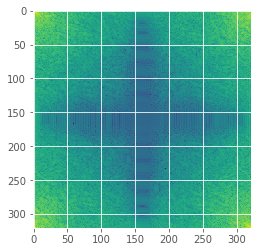

In [106]:
psd1=np.log10(abs(np.fft.fft2(im1[:,:,0])))*20
plt.imshow(psd1)


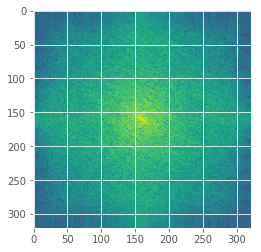

In [109]:
psd1=np.log10(abs(np.fft.fftshift(np.fft.fft2(im1[:,:,0]))))*20
plt.imshow(psd1)


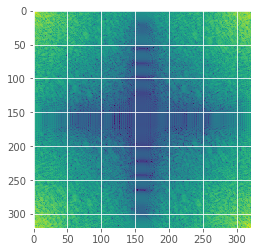

In [107]:
psd2=np.log10(abs(np.fft.fft2(im2[:,:,0])))*20
plt.imshow(psd2)

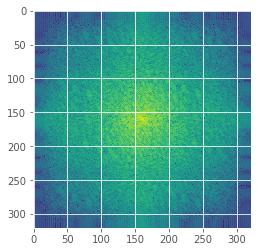

In [110]:
psd2=np.log10(abs(np.fft.fftshift(np.fft.fft2(im2[:,:,0]))))*20
plt.imshow(psd2)

In [ ]:
#radial averaging of PSD around center

In [139]:
x,y = np.meshgrid(np.arange(im1.shape[1]),np.arange(im1.shape[0]))
center = (im1.shape[0]//2, im2.shape[0]//2)
x -= center[0]
y -= center[1]

226.27416997969522


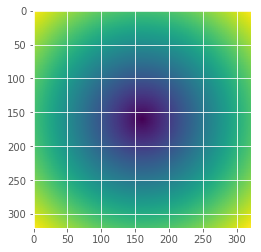

In [141]:
R = np.sqrt(x**2 + y**2)
plt.imshow(R)
print(np.max(R))

In [153]:
distances = np.linspace(0, 228, 228)

In [160]:
def take_radial_slice_mean(image, radius, distances):
    #print(image[(distances >= radius-.5) & (distances < radius+.5)])
    return image[(distances >= radius-.5) & (distances < radius+.5)].mean()

In [163]:
#plotting power per mode

(160, 160)


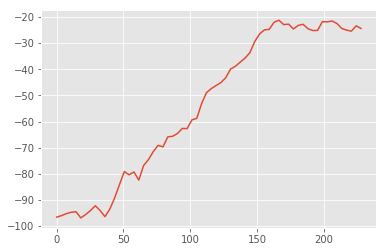

In [161]:
x,y = np.meshgrid(np.arange(im1.shape[1]),np.arange(im1.shape[0]))
R = np.sqrt(x**2+y**2)

midpoint = (im1.shape[0]//2, im2.shape[0]//2)
print(midpoint)
r  = np.linspace(0,228,num=64)
means = []
# plot it
for dist in r:
    means.append(take_radial_slice_mean(psd, dist, R))
    
fig,ax=plt.subplots()
ax.plot(r,means)
plt.show()